In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
data = pd.read_csv('/Users/priti16/Downloads/bank.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [146]:
print("The provided dataset consists of {rows} rows.".format(rows = len(data)))

The provided dataset consists of 11162 rows.


In [147]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [148]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


/var/folders/gw/s20hwlh97f7_13l5twqm79400000gn/T/ipykernel_10757/2927945030.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='pearson'), annot=True)


<AxesSubplot: >

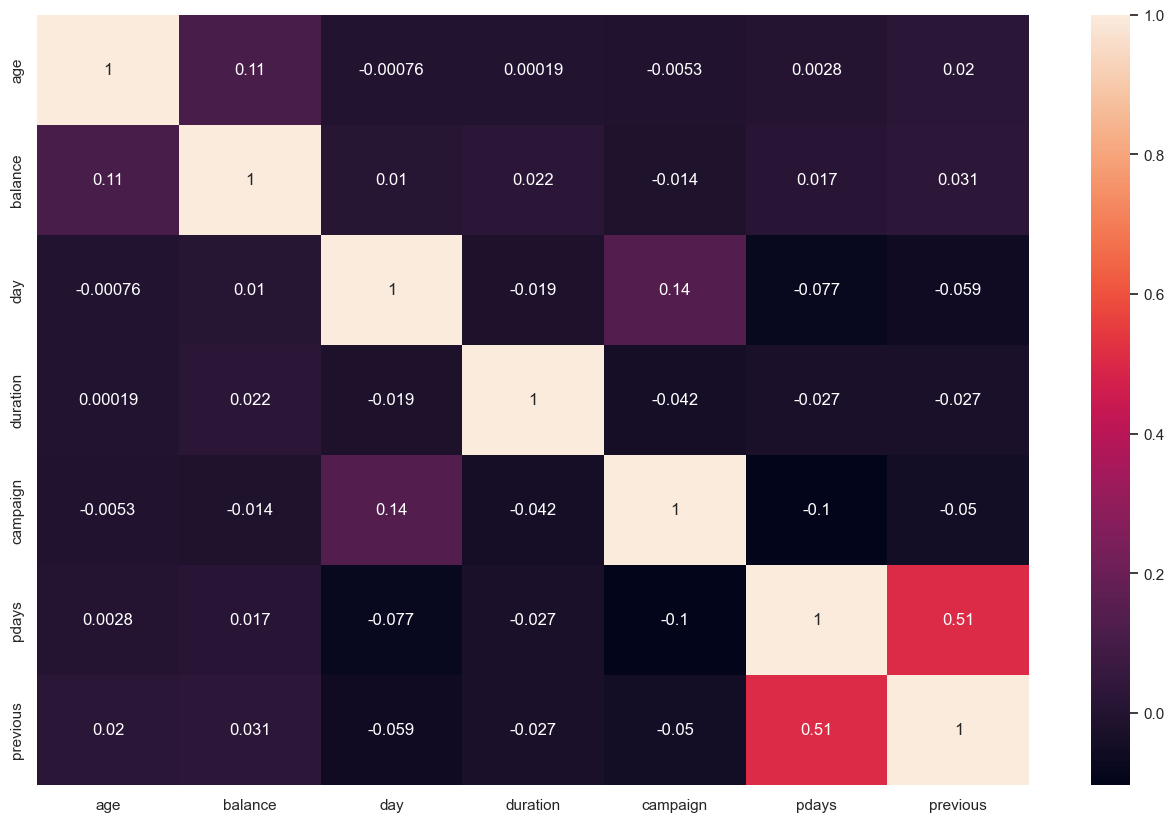

In [149]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

<AxesSubplot: ylabel='count'>

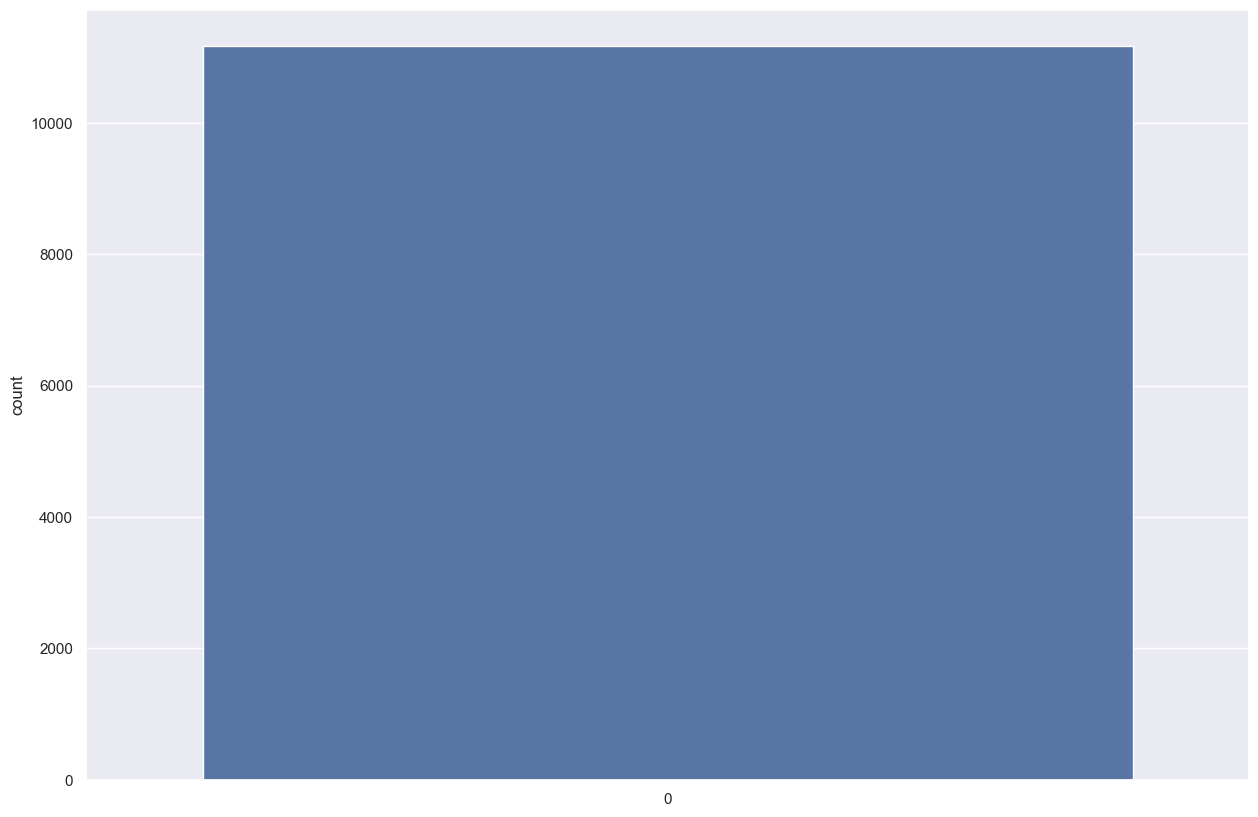

In [184]:
plt.figure(figsize=[15,10])
sns.countplot(data['balance'])

<AxesSubplot: ylabel='count'>

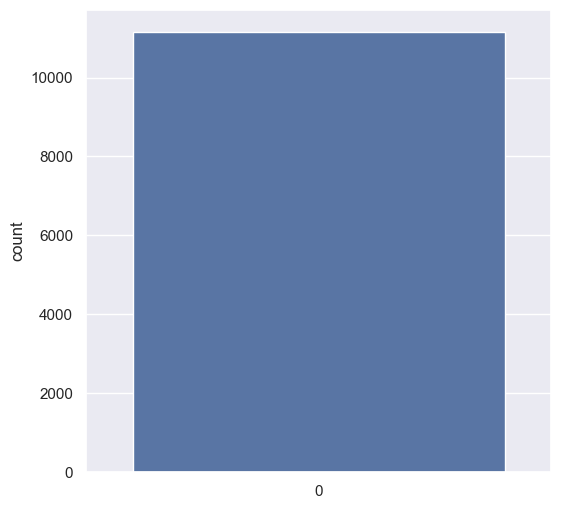

In [185]:
plt.figure(figsize=[6,6])
sns.countplot(data['age'])

<AxesSubplot: ylabel='count'>

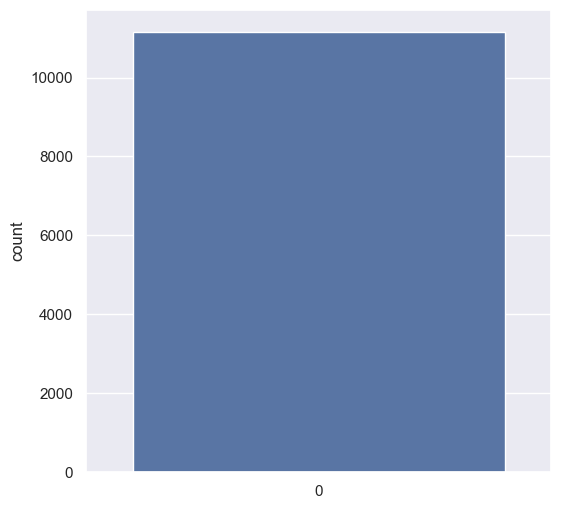

In [186]:
plt.figure(figsize=[6,6])
sns.countplot(data['day'])

Text(0.5, 1.0, 'Distribution of Balance by Education')

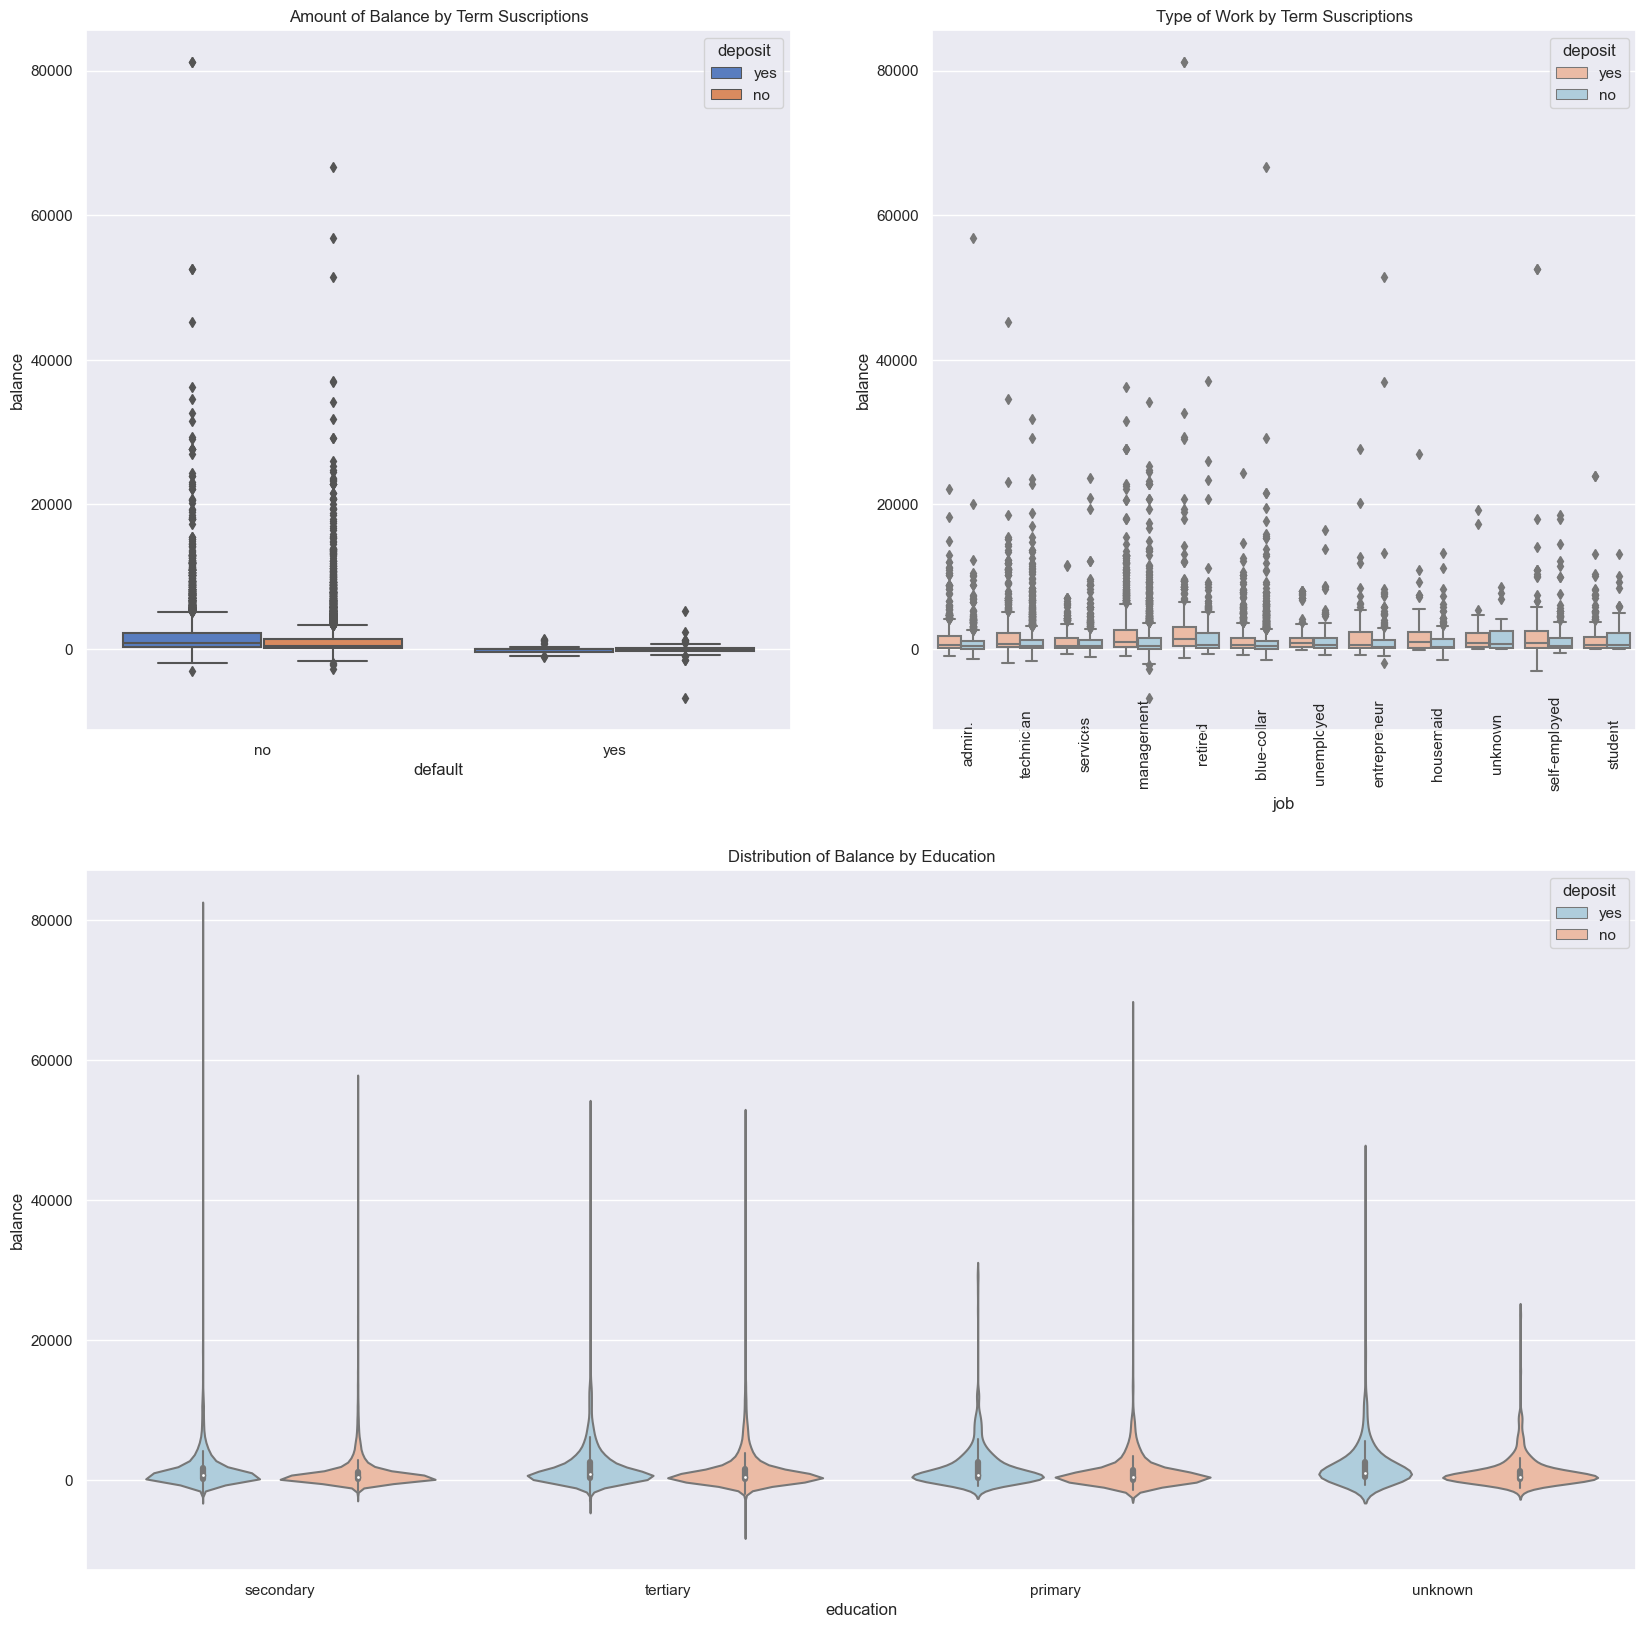

In [153]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=data, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=data, palette="RdBu", ax=ax2)

g1.set_xticklabels(data["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=data, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")

In [154]:
lst = [data]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

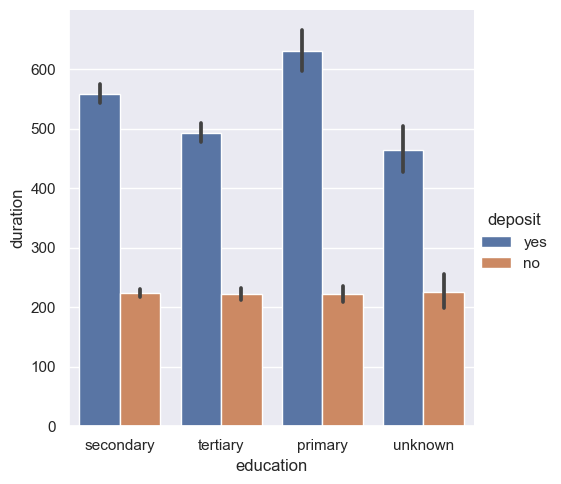

In [155]:
sns.catplot(x="education", y="duration",hue="deposit",
                data=data, kind="bar");

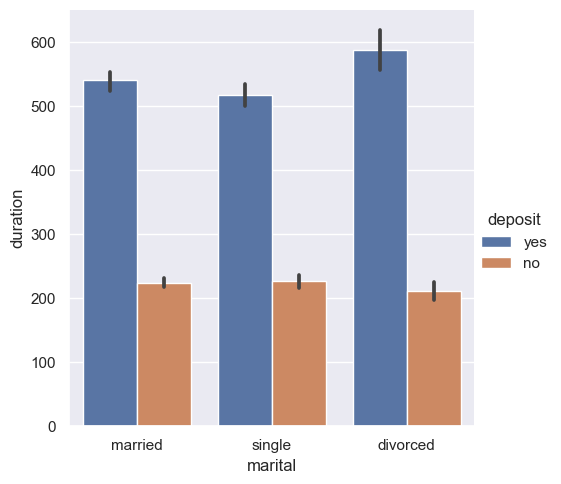

In [156]:
sns.catplot(x="marital", y="duration",hue="deposit",
                data=data, kind="bar");

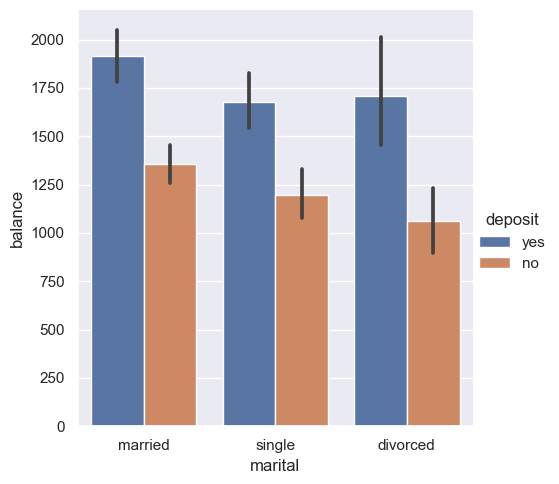

In [157]:
sns.catplot(x="marital", y="balance",hue="deposit",
                data=data, kind="bar");

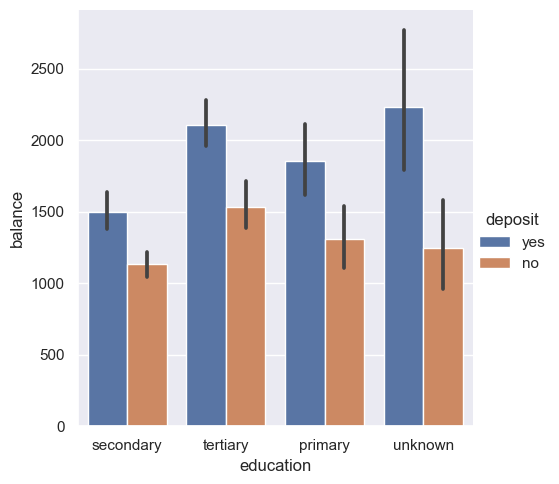

In [158]:
sns.catplot(x="education", y="balance",hue="deposit",
                data=data, kind="bar");

<AxesSubplot: title={'center': 'Job and deposit'}>

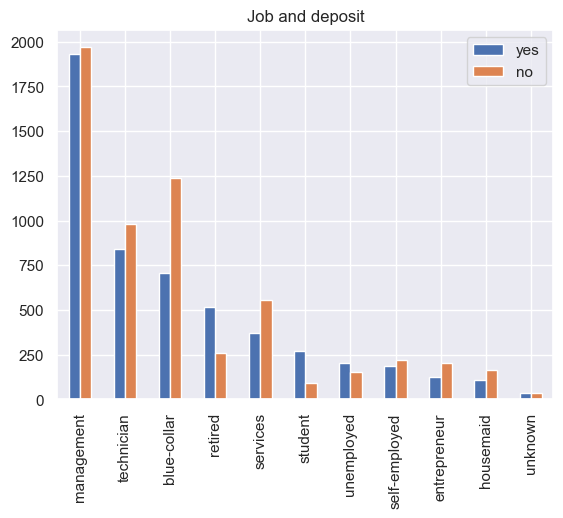

In [159]:

df = pd.DataFrame()

df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

df.plot.bar(title = 'Job and deposit')

In [161]:
#balance and deposit

balance_data = pd.DataFrame()
balance_data['balance_yes'] = (data[data['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
balance_data['balance_no'] = (data[data['deposit'] == 'no'][['deposit','balance']].describe())['balance']

balance_data

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<AxesSubplot: title={'center': 'Balance and deposit statistics'}>

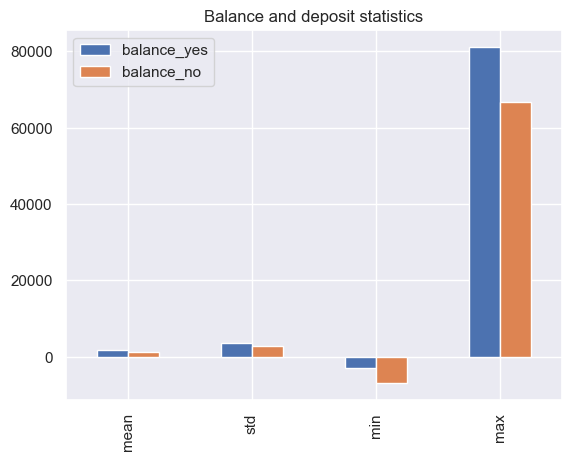

In [162]:
balance_data.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Balance and deposit statistics')

In [163]:

age_data = pd.DataFrame()
age_data['age_yes'] = (data[data['deposit'] == 'yes'][['deposit','age']].describe())['age']
age_data['age_no'] = (data[data['deposit'] == 'no'][['deposit','age']].describe())['age']

age_data

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot: title={'center': 'Age and deposit statistics'}>

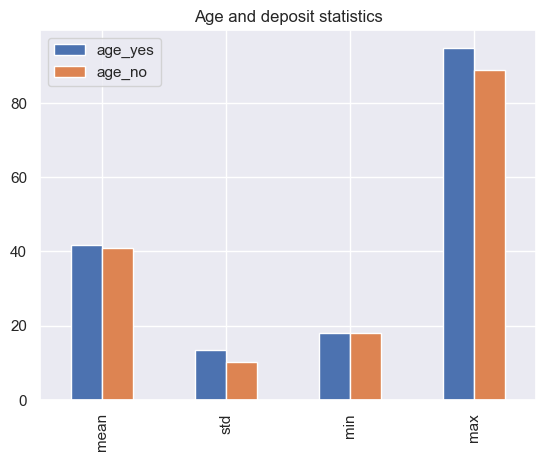

In [164]:
age_data.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [165]:
#number of contacts performed during this campaign ('campaign') and deposit
contact_data = pd.DataFrame()
contact_data['campaign_yes'] = (data[data['deposit'] == 'yes'][['deposit','campaign']].describe())['campaign']
contact_data['campaign_no'] = (data[data['deposit'] == 'no'][['deposit','campaign']].describe())['campaign']

contact_data

,campaign_yes,campaign_no
count,5289.000000,5873.000000
mean,2.141047,2.839264
std,1.921826,3.244474
min,1.000000,1.000000
25%,1.000000,1.000000
50%,2.000000,2.000000
75%,3.000000,3.000000
max,32.000000,63.000000


<AxesSubplot: title={'center': 'Number of contacts performed during this campaign and deposit statistics'}>

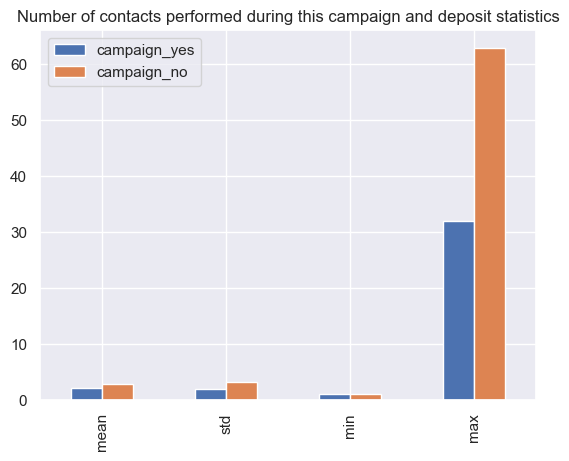

In [166]:
contact_data.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during this campaign and deposit statistics')

In [167]:
#number of contacts performed during previous campaign ('previous') and deposit
p_data = pd.DataFrame()
p_data['previous_yes'] = (data[data['deposit'] == 'yes'][['deposit','previous']].describe())['previous']
p_data['previous_no'] = (data[data['deposit'] == 'no'][['deposit','previous']].describe())['previous']

p_data

,previous_yes,previous_no
count,5289.000000,5873.00000
mean,1.170354,0.52835
std,2.553272,1.97961
min,0.000000,0.00000
25%,0.000000,0.00000
50%,0.000000,0.00000
75%,1.000000,0.00000
max,58.000000,41.00000


<AxesSubplot: title={'center': 'Number of contacts performed during previous campaign and deposit statistics'}>

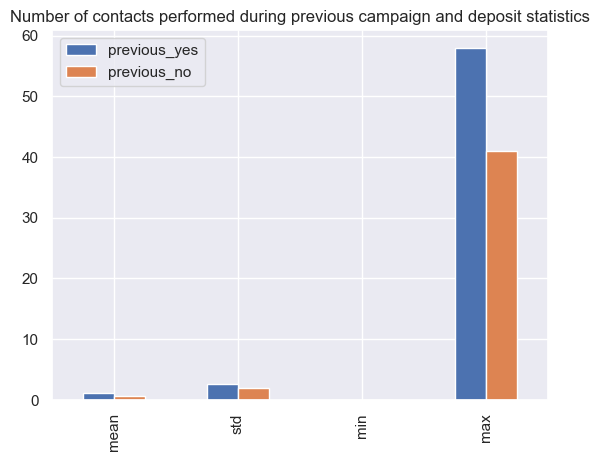

In [168]:
p_data.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Number of contacts performed during previous campaign and deposit statistics')

In [169]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['job']=labelencoder.fit_transform(data['job'])
data['marital']=labelencoder.fit_transform(data['marital'])
data['education']=labelencoder.fit_transform(data['education'])
data['default']=labelencoder.fit_transform(data['default'])
data['housing']=labelencoder.fit_transform(data['housing'])
data['loan']=labelencoder.fit_transform(data['loan'])
data['contact']=labelencoder.fit_transform(data['contact'])
data['month']=labelencoder.fit_transform(data['month'])
data['poutcome']=labelencoder.fit_transform(data['poutcome'])
data['deposit']=labelencoder.fit_transform(data['deposit'])

In [170]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,3,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,3,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,8,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,6,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,3,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,6,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,8,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,8,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [171]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [172]:
features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
label = ['deposit']

In [173]:
X = data[features]
y = data[label]

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [175]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [176]:
X_train

array([[ 0.90978871,  0.00958416, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [-0.10479863, -1.43102657, -0.32605872, ...,  2.71956102,
         0.08964975, -2.50833771],
       [-0.52754336, -0.35056852, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       ...,
       [-0.52754336,  1.4501949 , -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [ 0.82523977,  0.00958416, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [-0.95028809, -0.35056852,  1.27385409, ..., -0.47300506,
        -0.37429548,  0.51298031]])

In [177]:
X_test

array([[ 2.008925  ,  0.00958416, -1.92597153, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [-0.27389652, -1.43102657, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [-0.52754336, -1.43102657,  1.27385409, ...,  2.31239317,
         0.08964975, -2.50833771],
       ...,
       [-0.35844547, -0.35056852,  1.27385409, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [ 1.16343555, -0.35056852, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031],
       [-0.7811902 , -1.43102657, -0.32605872, ..., -0.47300506,
        -0.37429548,  0.51298031]])

In [178]:

import xgboost
from sklearn.metrics import accuracy_score

xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)


y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.923: test: 0.855


In [179]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_test_preds)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1917
           1       0.83      0.88      0.85      1767

    accuracy                           0.85      3684
   macro avg       0.85      0.86      0.85      3684
weighted avg       0.86      0.85      0.85      3684



In [180]:
cm = confusion_matrix(y_test, y_test_preds)
cm

array([[1595,  322],
       [ 214, 1553]])

In [181]:
predicted_probab_log = xgb.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


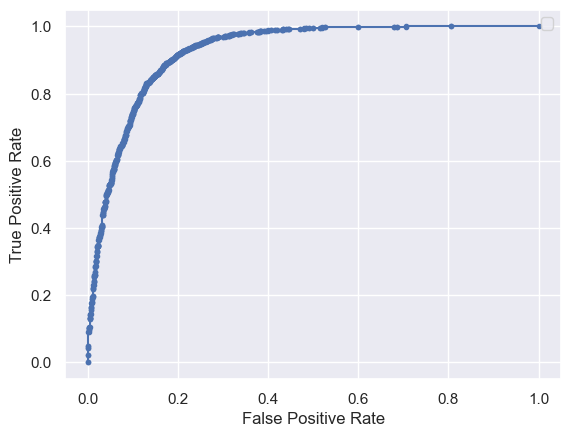

In [182]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()